## PyTorch: Datasets & DataLoaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

### Loading a Dataset

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="Datasets",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="Datasets",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 26421880/26421880 [00:16<00:00, 1565690.18it/s]


Extracting Datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to Datasets/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 553959.01it/s]

Extracting Datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Datasets/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:04<00:00, 951576.16it/s]


Extracting Datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Datasets/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 17096022.95it/s]

Extracting Datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Datasets/FashionMNIST/raw



### Iterating and Visualizing the Dataset

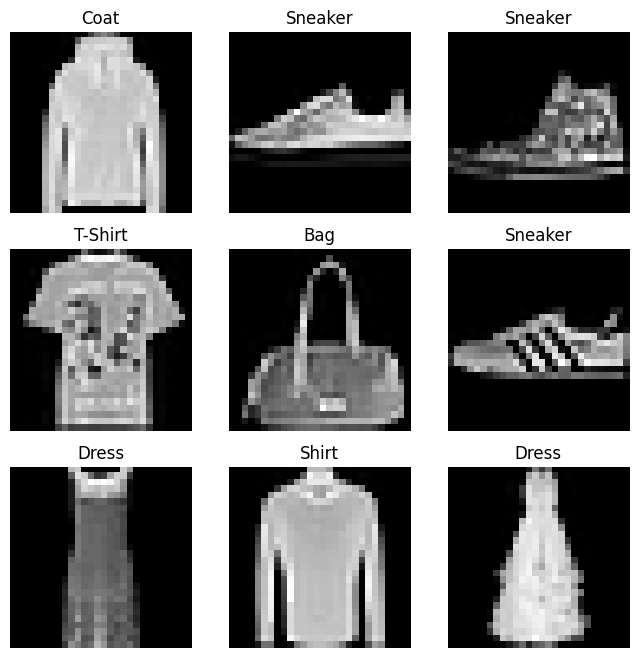

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating a custom dataset for your files - [Source](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files)

In [7]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### Preparing your data for training with DataLoaders

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


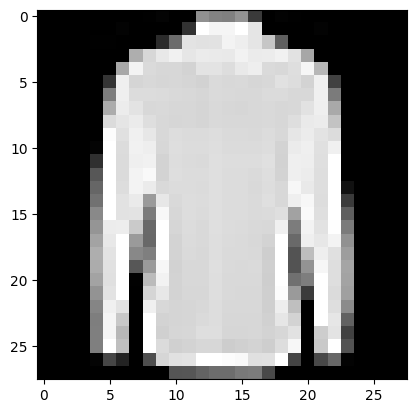

Label: Shirt


In [19]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[train_labels[0].item()]}")